<a href="https://colab.research.google.com/github/aishushan/prjctdeploy/blob/main/svmmodel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [130]:
import numpy as np
import pandas as pd
import os
import librosa
import wave
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
import IPython.display as ipd

In [131]:
#UPLOADING THE PARTICULAR AUDIO DATA
audio_file_path='/gdrive/MyDrive/kaggle/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav'

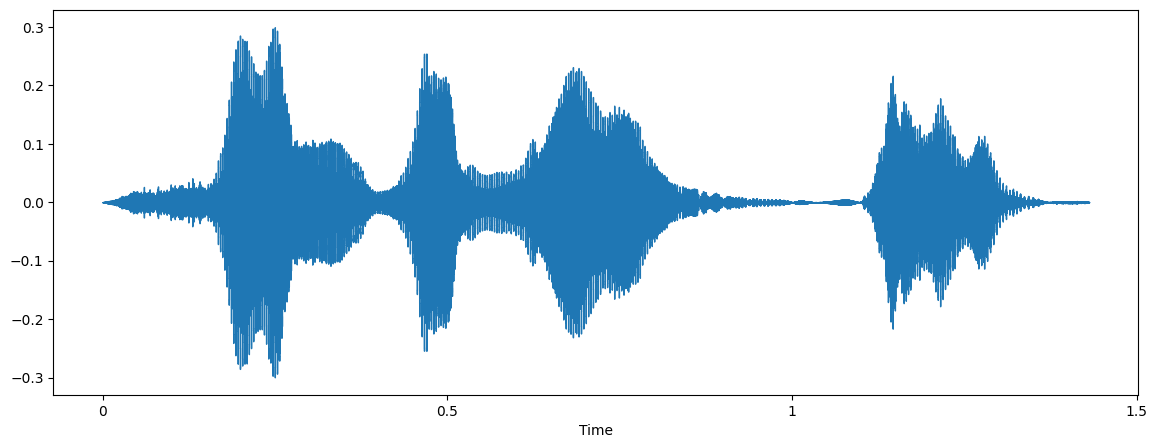

In [132]:
#PLOTING THE AUDIO DATA USING LIBROSA
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
librosa.display.waveshow(librosa_audio_data,sr=librosa_sample_rate)
ipd.Audio(audio_file_path)

In [133]:

import librosa.display
import matplotlib.pyplot as plt

# Define a function to extract MFCC, chroma, and mel spectrogram features from an audio file
def extract_features(wav_file_name):
    y, sr = librosa.load(wav_file_name)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)  # MFCC features
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)  # Chroma features
    mel = librosa.feature.melspectrogram(y=y, sr=sr)  # Mel spectrogram features
    return mfccs, chroma, mel


In [134]:
# Example usage: Extract and display MFCC, chroma, and mel spectrogram features
wav_file_to_display = '/gdrive/MyDrive/kaggle/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav'  # Replace with the path to your audio file
mfcc_features, chroma_features, mel_features = extract_features(wav_file_to_display)
mfcc_features
chroma_features


array([[7.77840257e-01, 8.04869294e-01, 9.52682912e-01, 6.83667600e-01,
        4.63633478e-01, 6.93856835e-01, 4.13882196e-01, 9.72478092e-03,
        1.52805622e-03, 2.02803873e-03, 4.18783631e-03, 7.12509081e-03,
        9.71610937e-03, 2.89101806e-02, 1.03096433e-01, 1.41897500e-01,
        7.50261620e-02, 2.87299976e-02, 1.13972658e-02, 1.80295762e-03,
        1.84661231e-03, 1.48637462e-02, 6.59896061e-02, 7.06057250e-02,
        6.15636865e-03, 3.47041176e-03, 4.81269974e-03, 7.33611872e-03,
        5.53551875e-03, 3.14632244e-03, 2.14491040e-03, 1.08372292e-03,
        4.15296439e-04, 6.19954546e-04, 4.61242674e-03, 7.51595423e-02,
        8.56541157e-01, 3.81448120e-01, 2.56340653e-01, 5.51603973e-01,
        2.28192538e-01, 7.78465793e-02, 1.34435249e-02, 1.16813257e-01,
        4.80597824e-01, 3.36506426e-01, 6.10217452e-01, 1.16763040e-01,
        3.69306542e-02, 2.14958489e-02, 1.80441998e-02, 4.22108732e-03,
        6.19209139e-03, 1.01455733e-01, 1.00000000e+00, 4.613472

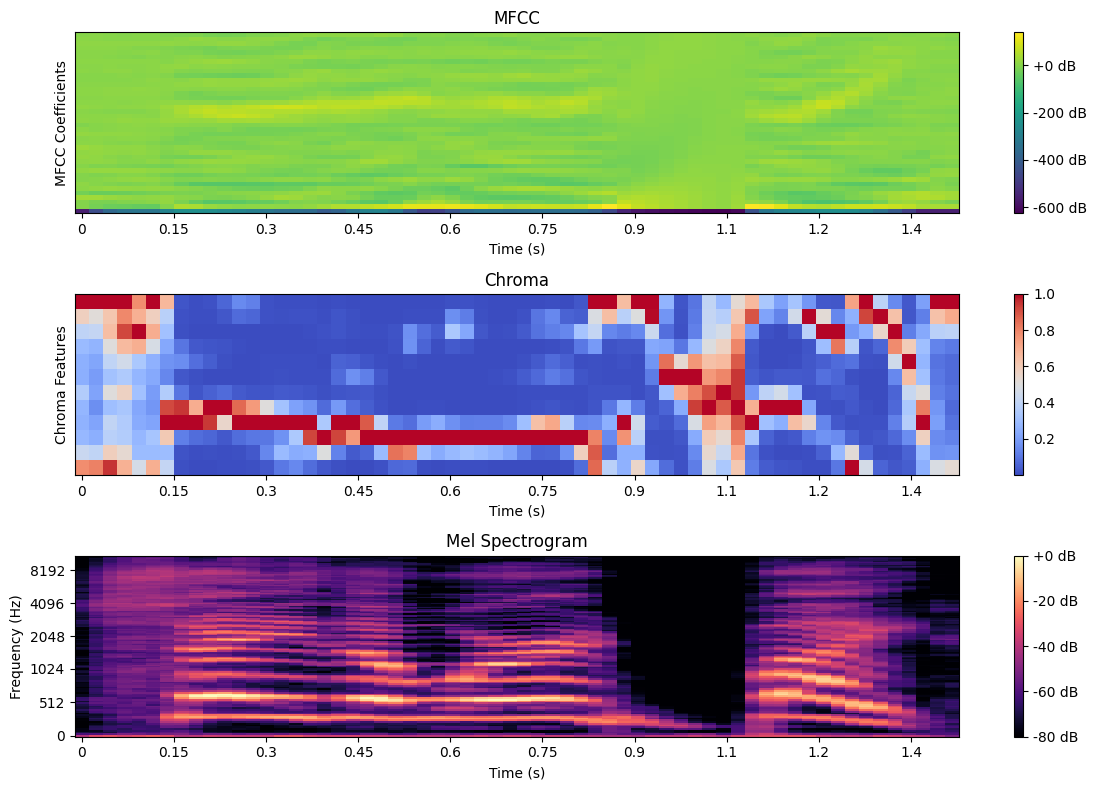

In [135]:
# Create subplots for MFCC, chroma, and mel spectrogram
plt.figure(figsize=(12, 8))

# Plot MFCC features
plt.subplot(3, 1, 1)
librosa.display.specshow(mfcc_features, x_axis='time', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')

# Plot chroma features
plt.subplot(3, 1, 2)
librosa.display.specshow(chroma_features, x_axis='time', cmap='coolwarm')
plt.colorbar()
plt.title('Chroma')
plt.xlabel('Time (s)')
plt.ylabel('Chroma Features')

# Plot mel spectrogram features
plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.power_to_db(mel_features, ref=np.max), y_axis='mel', x_axis='time', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()

In [136]:
import os

# Define the path to the TESS dataset directory
tess_dataset_path = '/gdrive/MyDrive/kaggle/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/'

# Initialize a set to store unique emotion labels
unique_emotion_labels = set()

# Iterate through the TESS dataset directory and collect unique emotion labels
for root, dirs, files in os.walk(tess_dataset_path):
    for file in files:
        if file.endswith(".wav"):
            # Extract the emotion label from the filename (assuming filename format)
            filename_without_extension = os.path.splitext(file)[0]
            parts = filename_without_extension.split('_')
            emotion = parts[2].lower()  # Emotion label is typically in the third part
            unique_emotion_labels.add(emotion)

# Print the unique emotion labels
print("Unique Emotion Labels:")
for emotion_label in unique_emotion_labels:
    print(emotion_label)


Unique Emotion Labels:
fear
happy
neutral
angry
disgust
sad
ps


In [137]:
def display_waveplot_and_spectrogram(audio_file_path):
    # Load the audio data and sample rate
    librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

    # Display the waveplot
    plt.figure(figsize=(14, 5))
    plt.title('Waveplot')
    librosa.display.waveshow(librosa_audio_data, sr=librosa_sample_rate)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # Display the spectrogram
    plt.figure(figsize=(14, 5))
    plt.title('Spectrogram')
    librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(librosa_audio_data), ref=np.max), y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()




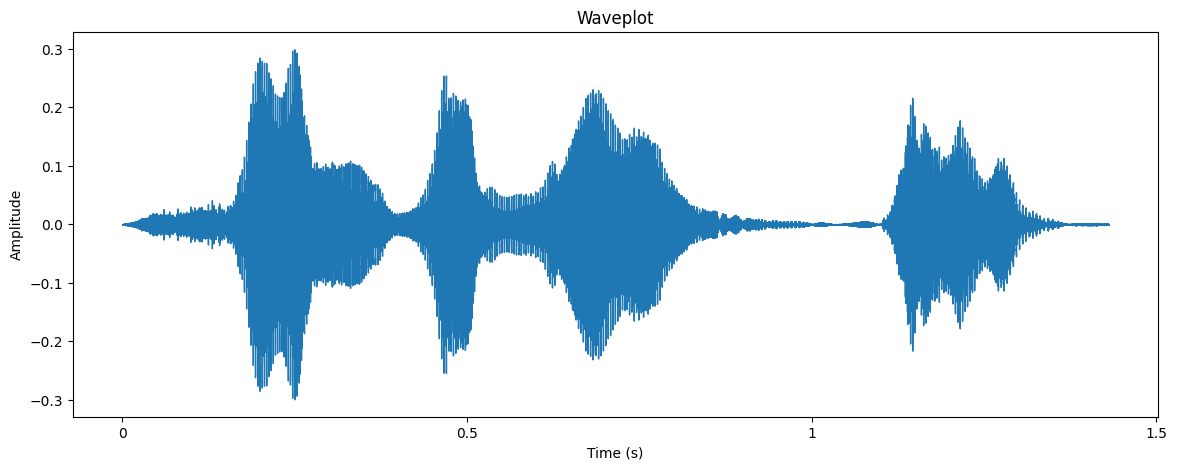

<ipython-input-137-3bc2a4faf792>:16: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(librosa_audio_data), ref=np.max), y_axis='log')


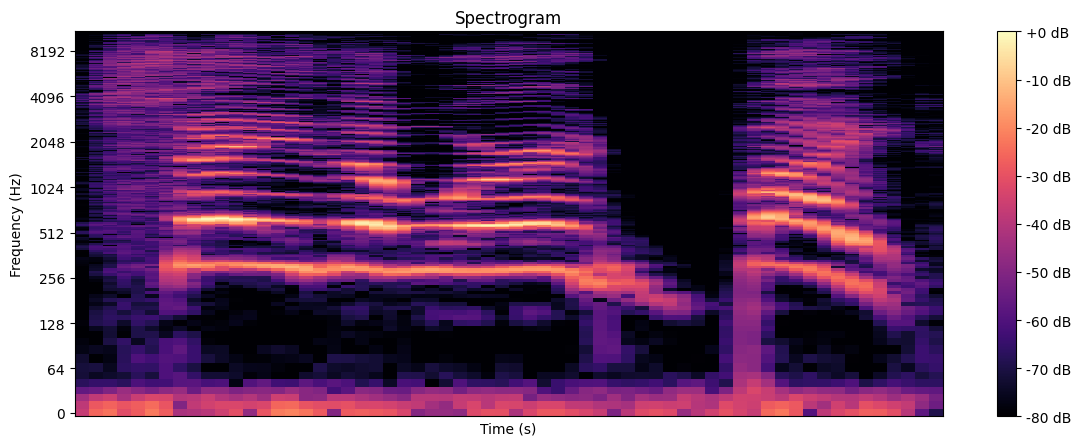

In [138]:
audio_file_path = '/gdrive/MyDrive/kaggle/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav'
display_waveplot_and_spectrogram(audio_file_path)
# Play the audio
ipd.Audio(audio_file_path)


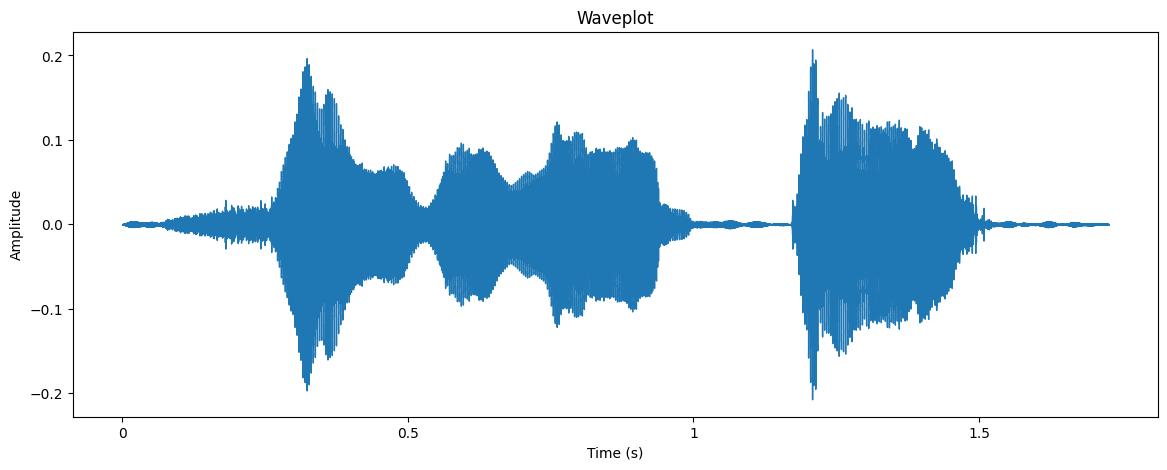

<ipython-input-137-3bc2a4faf792>:16: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(librosa_audio_data), ref=np.max), y_axis='log')


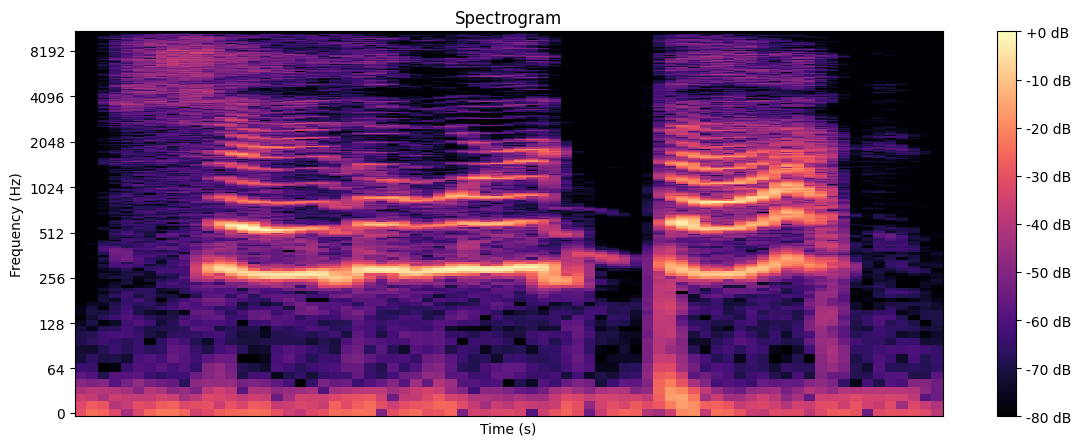

In [139]:
audio_file_path = '/gdrive/MyDrive/kaggle/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav'
display_waveplot_and_spectrogram(audio_file_path)
# Play the audio
ipd.Audio(audio_file_path)


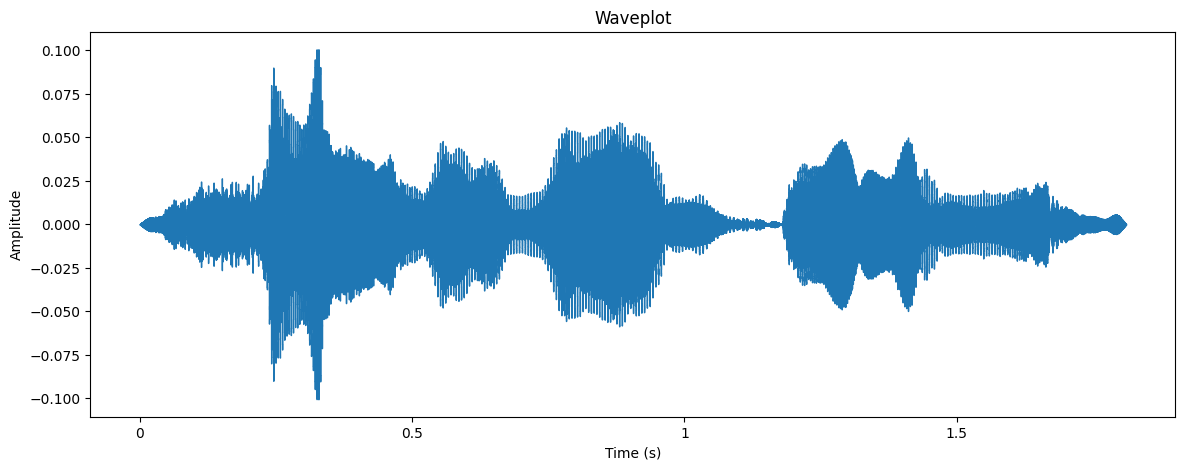

<ipython-input-137-3bc2a4faf792>:16: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(librosa_audio_data), ref=np.max), y_axis='log')


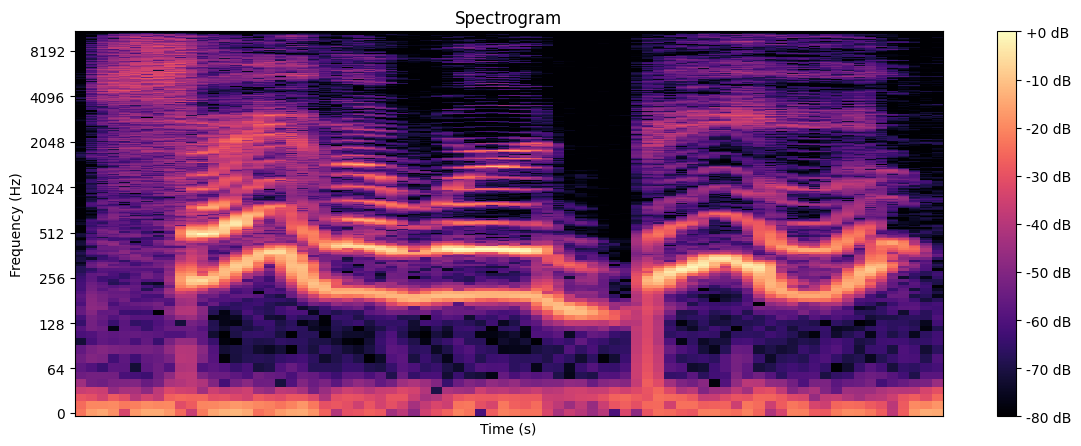

In [140]:
audio_file_path = '/gdrive/MyDrive/kaggle/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_bean_ps.wav'
display_waveplot_and_spectrogram(audio_file_path)
# Play the audio
ipd.Audio(audio_file_path)

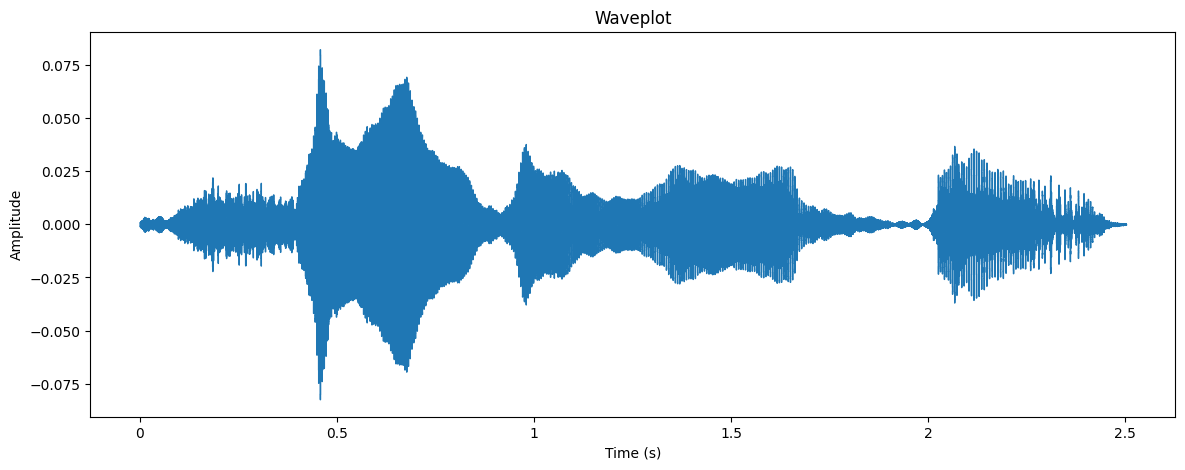

<ipython-input-137-3bc2a4faf792>:16: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(librosa_audio_data), ref=np.max), y_axis='log')


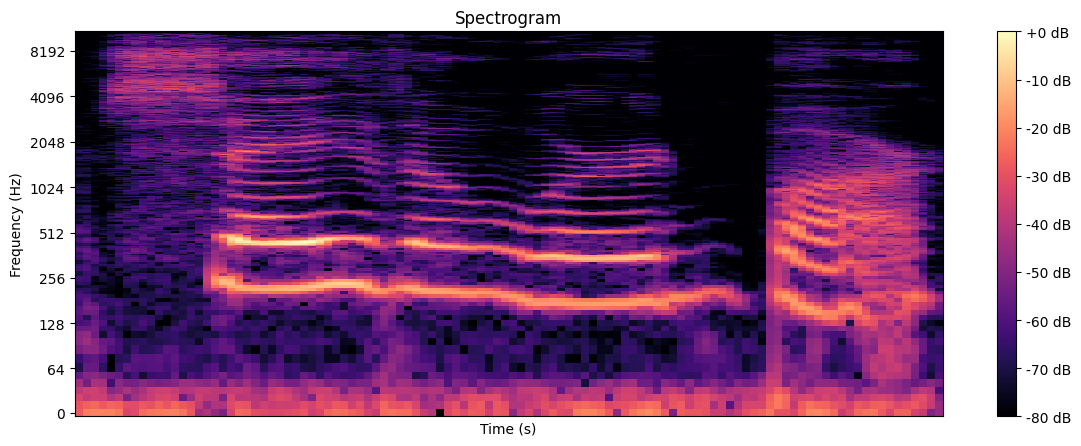

In [141]:
audio_file_path = '/gdrive/MyDrive/kaggle/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_bar_sad.wav'
display_waveplot_and_spectrogram(audio_file_path)
# Play the audio
ipd.Audio(audio_file_path)

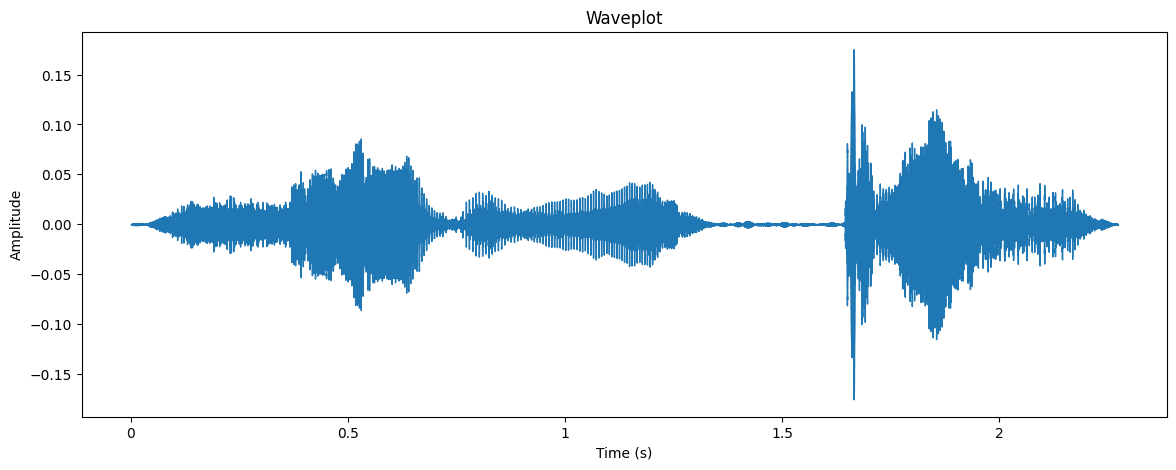

<ipython-input-137-3bc2a4faf792>:16: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(librosa_audio_data), ref=np.max), y_axis='log')


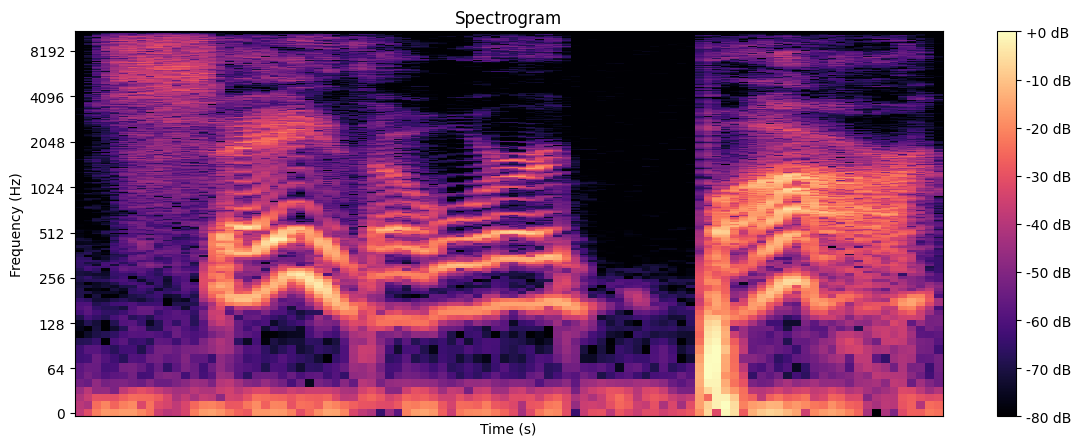

In [142]:
audio_file_path = '/gdrive/MyDrive/kaggle/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_bar_disgust.wav'
display_waveplot_and_spectrogram(audio_file_path)
# Play the audio
ipd.Audio(audio_file_path)

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import librosa.effects as effects


In [144]:
def extract_mfcc(wav_file_name):
    y, sr = librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)  # Chroma features
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)  # Mel spectrogram features


    return np.hstack((mfccs, chroma, mel))

In [145]:
# Define a dictionary to map emotion labels to numerical values
emotion_label_map = {
    "neutral": 0,
    "happy": 1,
    "sad": 2,
    "angry": 3,
    "fear": 4,
    "disgust": 5,
    "ps": 6
}

# Define the path to the TESS dataset directory
tess_dataset_path = '/gdrive/MyDrive/kaggle/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/'

In [146]:
# Initialize lists to store data and labels
tess_data = []
tess_labels = []

In [147]:

# Iterate through the TESS dataset directory and process each audio file
for root, dirs, files in os.walk(tess_dataset_path):
    for file in files:
        if file.endswith(".wav"):
            # Extract the emotion label from the filename (assuming filename format)
            filename_without_extension = os.path.splitext(file)[0]
            parts = filename_without_extension.split('_')
            emotion = parts[2].lower()  # Emotion label is typically in the third part
            if emotion in emotion_label_map:
                label = emotion_label_map[emotion]
                wav_file_path = os.path.join(root, file)
                mfcc_features = extract_mfcc(wav_file_path)
                tess_data.append(mfcc_features)
                tess_labels.append(label)

In [148]:
# Convert lists to NumPy arrays
tess_data = np.array(tess_data)
tess_labels = np.array(tess_labels)


In [149]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tess_data, tess_labels, test_size=0.2, random_state=60)

In [150]:
# Normalize the data (standardize)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)

[[ 0.3561347  -0.19201434 -0.3102469  ... -0.49991012 -0.5151659
  -0.51728773]
 [-0.7656489   0.88146925  0.8264356  ... -0.50525385 -0.51434094
  -0.5185046 ]
 [-0.8138685   1.2749189  -0.54119253 ... -0.51768064 -0.5235916
  -0.52812916]
 ...
 [ 0.71173704 -1.0822562  -0.3515593  ...  0.67464834  0.568806
   0.5979909 ]
 [ 1.3935949  -1.3505317  -1.3839123  ...  2.32538     2.5290446
   1.537487  ]
 [ 0.10976288 -0.11958013  0.15298648 ... -0.21457162 -0.30321163
  -0.22249588]]
[[ 0.31426668  0.8782048   1.5076241  ... -0.05588299 -0.20574452
  -0.37754837]
 [ 0.07181455 -0.8638591   1.3760297  ... -0.03322221 -0.03132253
  -0.02538949]
 [ 1.0597225  -0.53544974 -0.7473787  ... -0.06493064  0.08434214
   0.07893746]
 ...
 [-0.50503623  0.32316437  0.8132956  ... -0.44757524 -0.46812588
  -0.47603396]
 [ 0.15909743  1.156506   -0.48533666 ... -0.2726368  -0.2814163
  -0.27335414]
 [-1.2337245   1.0447387   1.3243498  ... -0.5141329  -0.52187854
  -0.5260869 ]]


In [151]:
print(X_train.shape)
print(X_test.shape)

(2240, 180)
(560, 180)


In [152]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# Flatten the feature arrays
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
print(X_train_flat.shape)
print(X_test_flat.shape)

# Create an SVM classifier
svm_classifier = svm.SVC(kernel='sigmoid', C=5.0, random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train_flat, y_train)

(2240, 180)
(560, 180)


SVC(C=5.0, kernel='sigmoid', random_state=42)

In [153]:
# Predict the labels for the test data
y_pred = svm_classifier.predict(X_test_flat)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_accuracy)

Accuracy: 0.9392857142857143


In [154]:
# Load and preprocess the new audio data (similar to your preprocessing steps)
new_audio_path = '/gdrive/MyDrive/kaggle/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_back_neutral.wav'  # Replace with the path to your new audio file
new_feature_vector = extract_mfcc(new_audio_path)

# Normalize the new feature vector using the same scaler you used for training
new_feature_vector_normalized = scaler.transform(new_feature_vector.reshape(1, -1))

# Predict the label for the new data using the trained SVM classifier
new_label = svm_classifier.predict(new_feature_vector_normalized)

# You can map the numerical label back to the corresponding emotion label
inverse_label_map = {v: k for k, v in emotion_label_map.items()}
predicted_emotion = inverse_label_map[new_label[0]]

print("Predicted Emotion:", predicted_emotion)


Predicted Emotion: neutral


In [155]:
pip install joblib


In [156]:
import joblib
import pickle

# Save the model to a file
joblib.dump(svm_classifier, 'svmmodel.pkl')


['svmmodel.pkl']

In [157]:
# Load the model from the file
loaded_svm_classifier = joblib.load('svmmodel.pkl')
loaded_svm_classifier

SVC(C=5.0, kernel='sigmoid', random_state=42)

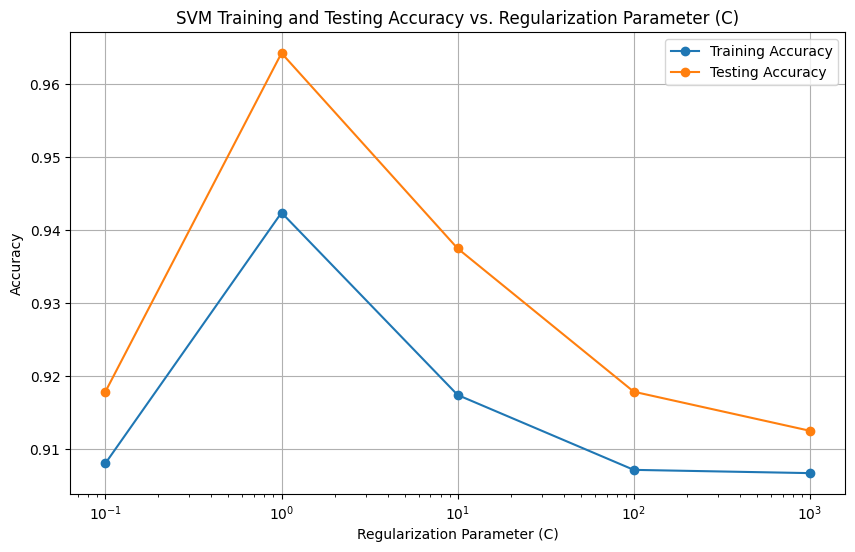

In [158]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score

# Define a range of regularization parameter values (C) to test
C_values = [0.1, 1, 10, 100, 1000]
train_accuracy = []
test_accuracy = []

for C in C_values:
    # Create an SVM classifier with the current C value
    svm_classifier = svm.SVC(kernel='sigmoid', C=C, random_state=42)

    # Train the SVM classifier on the training data
    svm_classifier.fit(X_train_flat, y_train)

    # Predict the labels for the training data
    y_train_pred = svm_classifier.predict(X_train_flat)

    # Predict the labels for the test data
    y_test_pred = svm_classifier.predict(X_test_flat)

    # Calculate training accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracy.append(train_acc)

    # Calculate testing accuracy
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracy.append(test_acc)

# Create a graph to visualize training and testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracy, marker='o', label='Training Accuracy')
plt.plot(C_values, test_accuracy, marker='o', label='Testing Accuracy')
plt.xscale('log')  # Set x-axis to a logarithmic scale for C values
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.title('SVM Training and Testing Accuracy vs. Regularization Parameter (C)')
plt.legend()
plt.grid(True)
plt.show()


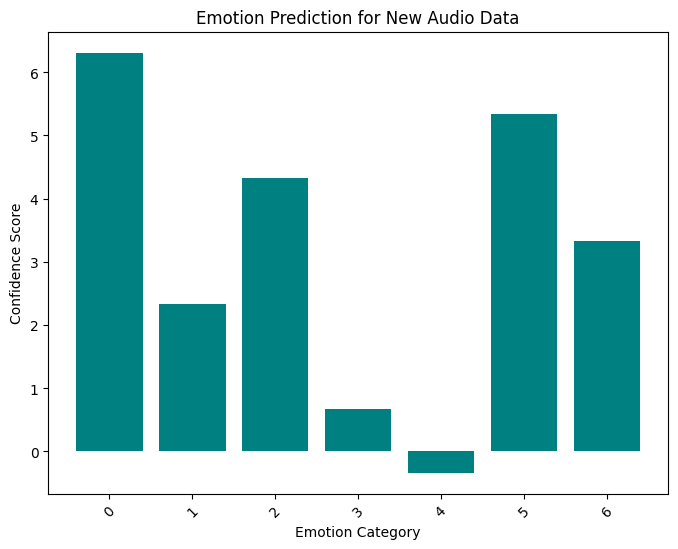

In [159]:
import matplotlib.pyplot as plt

# Assuming you have a list of emotion labels, you can use it to create the x-axis labels
emotion_labels = list(emotion_label_map.values())

# Use the prediction probabilities from the SVM classifier for the new audio data
new_data_prediction_probabilities = svm_classifier.decision_function(new_feature_vector_normalized)

# Create a bar chart to visualize the prediction probabilities
plt.figure(figsize=(8, 6))
plt.bar(emotion_labels, new_data_prediction_probabilities[0], color='teal')
plt.xlabel('Emotion Category')
plt.ylabel('Confidence Score')
plt.title('Emotion Prediction for New Audio Data')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


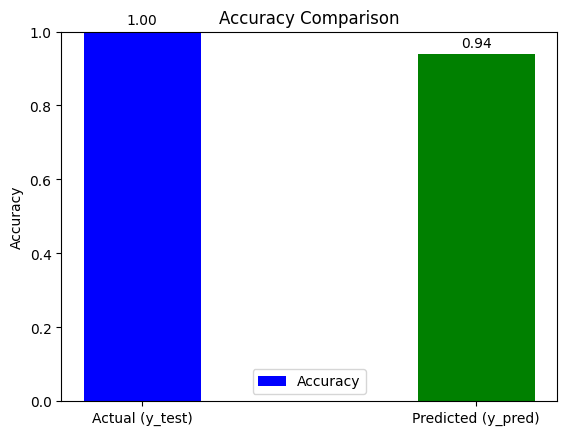

In [160]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Calculate the accuracy for the actual and predicted labels
actual_accuracy = accuracy_score(y_test, y_test)
predicted_accuracy = accuracy_score(y_test, y_pred)

# Create a bar chart to compare the accuracies
labels = ['Actual (y_test)', 'Predicted (y_pred)']
accuracies = [actual_accuracy, predicted_accuracy]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects = ax.bar(x, accuracies, width, label='Accuracy', color=['blue', 'green'])

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the values on top of the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom')

plt.ylim(0, 1.0)  # Set the y-axis range (0 to 1.0 for accuracy)
plt.show()


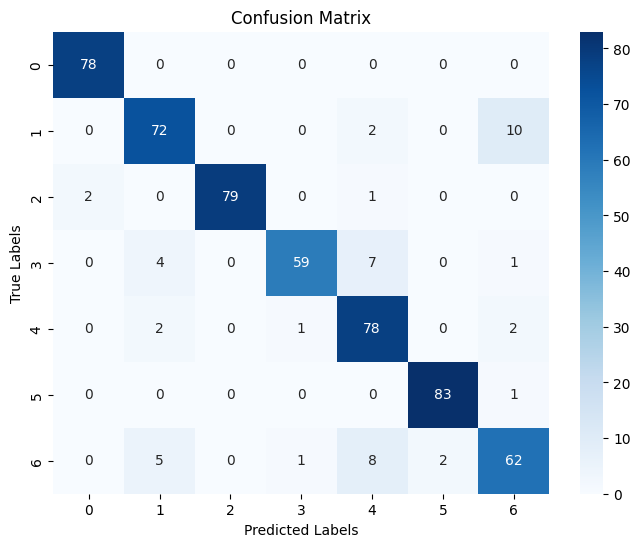

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        78
           1       0.87      0.86      0.86        84
           2       1.00      0.96      0.98        82
           3       0.97      0.83      0.89        71
           4       0.81      0.94      0.87        83
           5       0.98      0.99      0.98        84
           6       0.82      0.79      0.81        78

    accuracy                           0.91       560
   macro avg       0.92      0.91      0.91       560
weighted avg       0.92      0.91      0.91       560



In [161]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels for the test data
y_pred = svm_classifier.predict(X_test_flat)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Create a classification report
class_report = classification_report(y_test, y_pred)

# Display the classification report
print("Classification Report:\n", class_report)


In [162]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [163]:
# Reshape the data for Conv1D
X_train = X_train[:, :, np.newaxis]
X_test = X_test[:, :, np.newaxis]


In [164]:
# Define the Conv1D model
model = Sequential()

# Convolutional Layer 1
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))

In [165]:
# Convolutional Layer 2
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(2))


In [166]:
# Global Average Pooling
model.add(GlobalAveragePooling1D())

In [167]:
# Fully Connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(7, activation='softmax'))

In [168]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [169]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 178, 64)           256       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 89, 64)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 87, 128)           24704     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 43, 128)          0         
 1D)                                                             
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                      

In [170]:
history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
70/70 [==============================] - 5s 37ms/step - loss: 1.8538 - accuracy: 0.1915 - val_loss: 1.7427 - val_accuracy: 0.2071
Epoch 2/10
70/70 [==============================] - 2s 26ms/step - loss: 1.7492 - accuracy: 0.2701 - val_loss: 1.6534 - val_accuracy: 0.2804
Epoch 3/10
70/70 [==============================] - 3s 43ms/step - loss: 1.6407 - accuracy: 0.3326 - val_loss: 1.4880 - val_accuracy: 0.4750
Epoch 4/10
70/70 [==============================] - 3s 49ms/step - loss: 1.4643 - accuracy: 0.4304 - val_loss: 1.2406 - val_accuracy: 0.5571
Epoch 5/10
70/70 [==============================] - 5s 77ms/step - loss: 1.2955 - accuracy: 0.5018 - val_loss: 1.1213 - val_accuracy: 0.5464
Epoch 6/10
70/70 [==============================] - 5s 67ms/step - loss: 1.1882 - accuracy: 0.5339 - val_loss: 1.0000 - val_accuracy: 0.6429
Epoch 7/10
70/70 [==============================] - 4s 53ms/step - loss: 1.1145 - accuracy: 0.5562 - val_loss: 0.9309 - val_accuracy: 0.6321
Epoch 8/10
70

In [171]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


18/18 [==============================] - 0s 16ms/step - loss: 0.7554 - accuracy: 0.7411
Test Accuracy: 0.7410714030265808


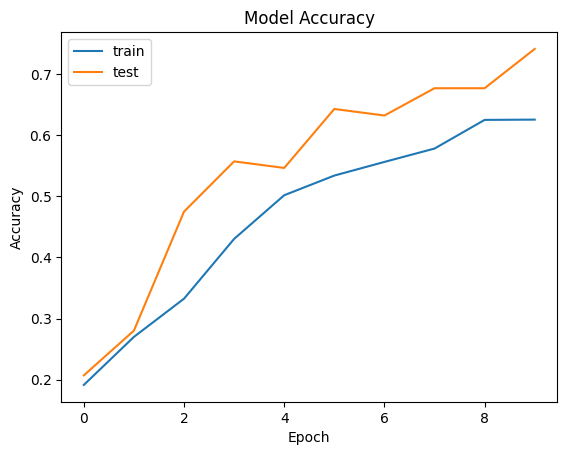

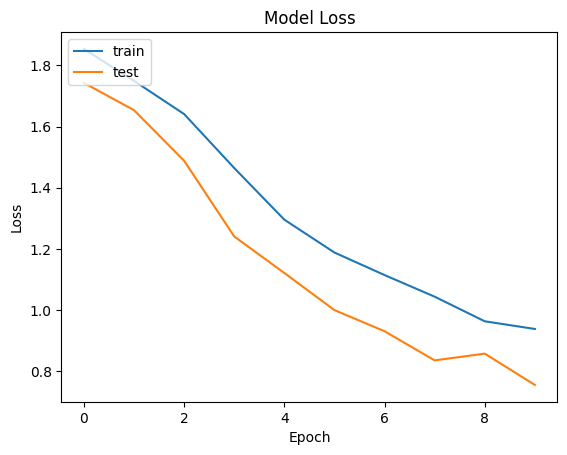

In [172]:
# Visualize training and validation accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [173]:
import numpy as np

# Replace 'new_audio_path' with the actual path to your new audio file
new_audio_path = '/gdrive/MyDrive/kaggle/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_base_fear.wav'

# Function to preprocess the new audio data
def preprocess_new_audio(audio_file_path):
    y, sr = librosa.load(audio_file_path)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)
    # Reshape the data for Conv1D (add the channel dimension)
    audio_data = np.hstack((mfccs, chroma, mel)).reshape(1, -1, 1)
    return audio_data

# Preprocess the new audio data
new_data = preprocess_new_audio(new_audio_path)

# Use the trained Conv1D model to make predictions
predictions = model.predict(new_data)

# Get the predicted class (index)
predicted_class = np.argmax(predictions)

# Convert the class index to the corresponding emotion label
emotion_labels = ["neutral", "happy", "sad", "angry", "fear", "disgust", "ps"]
predicted_emotion = emotion_labels[predicted_class]

print("Predicted Emotion:", predicted_emotion)


1/1 [==============================] - 1s 508ms/step
Predicted Emotion: neutral


In [174]:
#lstm
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# Assuming you have already loaded and preprocessed your data (X_train, y_train, X_test, y_test)

# Encode the emotion labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)

In [175]:
# Convert emotion labels to one-hot encoded format
y_train_onehot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes=num_classes)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# Define the LSTM model
model = Sequential()

In [176]:
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.5))

In [177]:
model.add(LSTM(128))
model.add(Dropout(0.5))

In [178]:
# Add a fully connected layer
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.5))


In [179]:
# Output layer with softmax activation for multi-class classification
model.add(Dense(num_classes, activation='softmax'))

In [180]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [181]:
# Train the model
model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=10, batch_size=64)

Epoch 1/10
35/35 [==============================] - 41s 1s/step - loss: 2.1483 - accuracy: 0.1746 - val_loss: 1.7785 - val_accuracy: 0.2339
Epoch 2/10
35/35 [==============================] - 37s 1s/step - loss: 1.9232 - accuracy: 0.1933 - val_loss: 1.7601 - val_accuracy: 0.2964
Epoch 3/10
35/35 [==============================] - 35s 1s/step - loss: 1.8360 - accuracy: 0.2223 - val_loss: 1.7183 - val_accuracy: 0.2554
Epoch 4/10
35/35 [==============================] - 40s 1s/step - loss: 1.7906 - accuracy: 0.2464 - val_loss: 1.7111 - val_accuracy: 0.3071
Epoch 5/10
35/35 [==============================] - 39s 1s/step - loss: 1.7415 - accuracy: 0.2723 - val_loss: 1.6562 - val_accuracy: 0.3196
Epoch 6/10
35/35 [==============================] - 37s 1s/step - loss: 1.6874 - accuracy: 0.3036 - val_loss: 1.5786 - val_accuracy: 0.4125
Epoch 7/10
35/35 [==============================] - 36s 1s/step - loss: 1.6596 - accuracy: 0.3228 - val_loss: 1.6801 - val_accuracy: 0.3179
Epoch 8/10
35/35 [==

In [182]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

18/18 [==============================] - 5s 241ms/step
Test Accuracy: 29.82%


In [183]:
# Define a function to predict emotions from an audio file
def predict_emotion(wav_file_name, model):
    # Extract MFCC features from the audio file
    mfcc_features = extract_mfcc(wav_file_name)

    # Normalize the features using the same scaler used during training
    mfcc_features = scaler.transform(mfcc_features.reshape(1, -1))

    # Make predictions using the trained model
    predicted_class = np.argmax(model.predict(mfcc_features), axis=-1)

    # Map the predicted class back to an emotion label
    emotion_labels = ["neutral", "happy", "sad", "angry", "fear", "disgust", "ps"]
    predicted_emotion = emotion_labels[predicted_class[0]]

    return predicted_emotion


In [184]:
import numpy as np

# Replace 'new_audio_path' with the actual path to your new audio file
new_audio_path = '/gdrive/MyDrive/kaggle/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav'

# Function to preprocess the new audio data
def preprocess_new_audio(audio_file_path):
    y, sr = librosa.load(audio_file_path)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)
    # Reshape the data for Conv1D (add the channel dimension)
    audio_data = np.hstack((mfccs, chroma, mel)).reshape(1, -1, 1)
    return audio_data

# Preprocess the new audio data
new_data = preprocess_new_audio(new_audio_path)

# Use the trained Conv1D model to make predictions
predictions = model.predict(new_data)

# Get the predicted class (index)
predicted_class = np.argmax(predictions)

# Convert the class index to the corresponding emotion label
emotion_labels = ["neutral", "happy", "sad", "angry", "fear", "disgust", "ps"]
predicted_emotion = emotion_labels[predicted_class]

print("Predicted Emotion:", predicted_emotion)


1/1 [==============================] - 0s 79ms/step
Predicted Emotion: neutral


In [185]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [186]:
# Create a Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

In [187]:
from sklearn.naive_bayes import GaussianNB

# Assuming you have already loaded and preprocessed your data as X_train, X_test, y_train, y_test

# Reshape the feature data to make it 2D
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

In [188]:
naive_bayes_classifier = GaussianNB()

# Train the classifier on the reshaped training data
naive_bayes_classifier.fit(X_train_reshaped, y_train)

GaussianNB()

In [189]:
# Make predictions on the reshaped test data
predictions = naive_bayes_classifier.predict(X_test_reshaped)

In [190]:
# Calculate accuracy
correct_predictions = np.sum(predictions == y_test)
total_predictions = len(y_test)
naive_bayes_classifieraccuracy = correct_predictions / total_predictions

print(f"Accuracy on Test Data: {naive_bayes_classifieraccuracy*100}")

Accuracy on Test Data: 82.32142857142857


In [196]:
# Load and preprocess the new audio data (similar to your preprocessing steps)
new_audio_path = '/gdrive/MyDrive/kaggle/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_bath_neutral.wav'  # Replace with the path to your new audio file
new_feature_vector = extract_mfcc(new_audio_path)

# Normalize the new feature vector using the same scaler you used for training
new_feature_vector_normalized = scaler.transform(new_feature_vector.reshape(1, -1))

# Predict the label for the new data using the trained SVM classifier
new_label = naive_bayes_classifier.predict(new_feature_vector_normalized)

# You can map the numerical label back to the corresponding emotion label
inverse_label_map = {v: k for k, v in emotion_label_map.items()}
predicted_emotion = inverse_label_map[new_label[0]]

print("Predicted Emotion:", predicted_emotion)


Predicted Emotion: neutral


In [200]:
# Make predictions on the reshaped training data
train_predictions = naive_bayes_classifier.predict(X_train_reshaped)
# Calculate training accuracy
correct_train_predictions = np.sum(train_predictions == y_train)
total_train_predictions = len(y_train)
training_accuracy = correct_train_predictions / total_train_predictions
# Make predictions on the reshaped test data
test_predictions = naive_bayes_classifier.predict(X_test_reshaped)
# Calculate testing accuracy
correct_test_predictions = np.sum(test_predictions == y_test)
total_test_predictions = len(y_test)
testing_accuracy = correct_test_predictions / total_test_predictions

print(f"Training Accuracy: {training_accuracy*100:.2f}%")
print(f"Testing Accuracy: {testing_accuracy*100:.2f}%")


Training Accuracy: 81.56%
Testing Accuracy: 82.32%


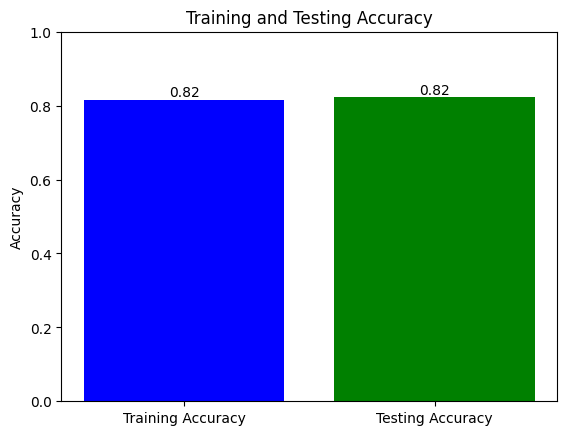

In [201]:
import matplotlib.pyplot as plt

# Calculate the training and testing accuracy (assuming you have already trained the classifier)
training_accuracy = correct_train_predictions / total_train_predictions
testing_accuracy = correct_test_predictions / total_test_predictions

# Create a bar chart to visualize the accuracy
labels = ['Training Accuracy', 'Testing Accuracy']
accuracy_values = [training_accuracy, testing_accuracy]

plt.bar(labels, accuracy_values, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.ylim(0, 1.0)  # Set the y-axis limit to the range [0, 1]

# Display the accuracy values on top of the bars
for i, v in enumerate(accuracy_values):
    plt.text(i, v, f'{v:.2f}', color='black', ha='center', va='bottom')

plt.show()


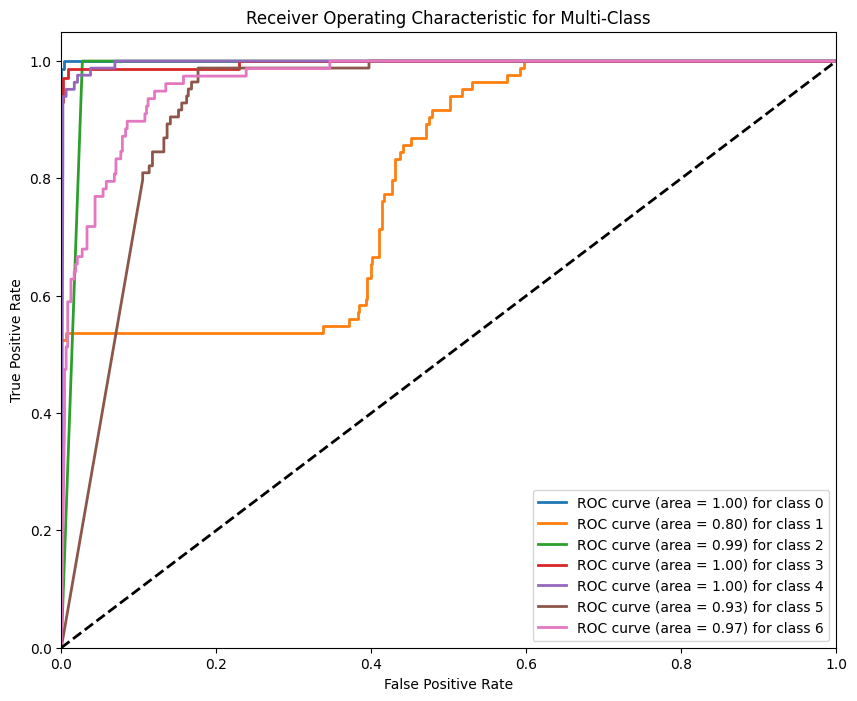

ROC AUC for class 0: 1.00
ROC AUC for class 1: 0.80
ROC AUC for class 2: 0.99
ROC AUC for class 3: 1.00
ROC AUC for class 4: 1.00
ROC AUC for class 5: 0.93
ROC AUC for class 6: 0.97


In [207]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Assuming you have already trained a Gaussian Naive Bayes classifier and have X_test and y_test (multi-class)
n_classes = len(np.unique(y_test))

# Binarize the output for each class
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Initialize a list to store ROC AUC for each class
roc_auc = []

# Initialize a plot
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    # Make probability predictions for class i
    y_scores = naive_bayes_classifier.predict_proba(X_test_reshaped)[:, i]

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores)
    roc_auc_i = auc(fpr, tpr)
    roc_auc.append(roc_auc_i)

    # Plot the ROC curve for class i
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc_i:.2f}) for class {i}')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC for each class
for i, auc_i in enumerate(roc_auc):
    print(f'ROC AUC for class {i}: {auc_i:.2f}')


In [208]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [209]:
# Flatten the data along the time steps axis (axis=1)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=5, random_state=30)

# Train the classifier on the flattened training data
rf_classifier.fit(X_train_flat, y_train)

# Flatten X_test in the same way
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Predict the labels for the testing data
y_pred = rf_classifier.predict(X_test_flat)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)


Testing Accuracy: 0.9678571428571429


In [210]:
# Load and preprocess the new audio data (similar to your preprocessing steps)
new_audio_path = '/gdrive/MyDrive/kaggle/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_bar_neutral.wav'  # Replace with the path to your new audio file
new_feature_vector = extract_mfcc(new_audio_path)

# Normalize the new feature vector using the same scaler you used for training
new_feature_vector_normalized = scaler.transform(new_feature_vector.reshape(1, -1))

# Predict the label for the new data using the trained SVM classifier
new_label = rf_classifier.predict(new_feature_vector_normalized)

# You can map the numerical label back to the corresponding emotion label
inverse_label_map = {v: k for k, v in emotion_label_map.items()}
predicted_emotion = inverse_label_map[new_label[0]]

print("Predicted Emotion:", predicted_emotion)


Predicted Emotion: neutral


In [211]:
# Calculate the accuracy of the model on the testing data
testing_accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", testing_accuracy)

# If you want to display the training accuracy, you can predict labels for the training data
y_train_pred = rf_classifier.predict(X_train_2D)
training_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", training_accuracy)

Testing Accuracy: 0.9678571428571429
Training Accuracy: 0.9973214285714286


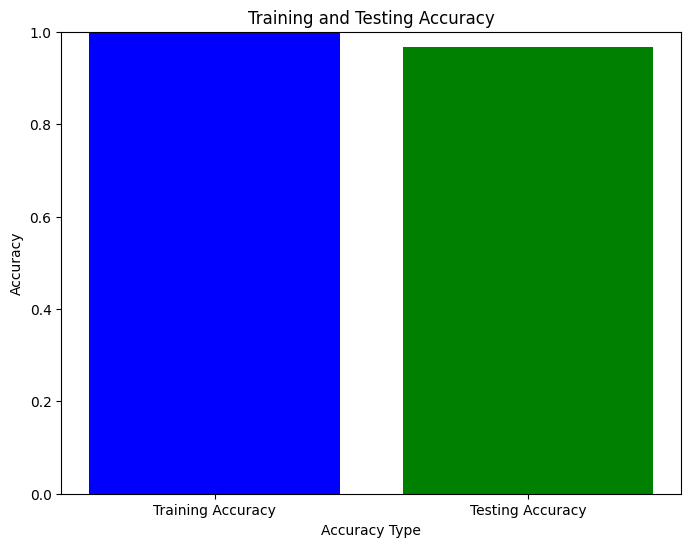

In [212]:
import matplotlib.pyplot as plt

# Calculate the accuracy of the model on the training and testing data
training_accuracy = accuracy_score(y_train, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_pred)

# Create a bar chart to display the accuracies
labels = ['Training Accuracy', 'Testing Accuracy']
accuracies = [training_accuracy, testing_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.ylim(0, 1.0)  # Set the y-axis limit to the range of accuracy (0 to 1)
plt.show()
